In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [79]:
data = load_wine()
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


#### Single Decision Tree

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=3)
sdt = cross_val_score(clf, df, data.target)
print(f"mean of decision tree score: {np.mean(sdt)}")
sdt

mean of decision tree score: 0.8882539682539681


array([0.94444444, 0.80555556, 0.80555556, 0.91428571, 0.97142857])

#### Bagged Decision Tree

In [81]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, min_samples_leaf=3), n_estimators=50, random_state=1)
bagging  = cross_val_score(clf, df, data.target)
print(f"mean of bagged tree score: {np.mean(bagging)}")
bagging

mean of bagged tree score: 0.9498412698412698


array([0.91666667, 0.91666667, 0.94444444, 0.97142857, 1.        ])

#### AdaBoost algorithm for decision trees

In [82]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=3, random_state=1, max_depth=1), n_estimators=50, random_state=1, algorithm='SAMME')
#clf.fit(df, data.target)
Ada = cross_val_score(clf, df, data.target)
print(f"AdaBoostClassifier mean: {np.mean(Ada)}")
Ada



AdaBoostClassifier mean: 0.9333333333333332


array([0.83333333, 0.91666667, 0.91666667, 1.        , 1.        ])

#### Gradient Boosting algorithm for decision trees

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1, min_samples_leaf=3, n_estimators=50, max_depth=1, learning_rate=1, subsample=0.5)
grad = cross_val_score(clf, df, data.target)
print(f"Gradient Boosting Algorithm mean: {np.mean(grad)}")
grad



Gradient Boosting Algorithm mean: 0.8522222222222222


array([0.91666667, 0.97222222, 0.97222222, 0.42857143, 0.97142857])

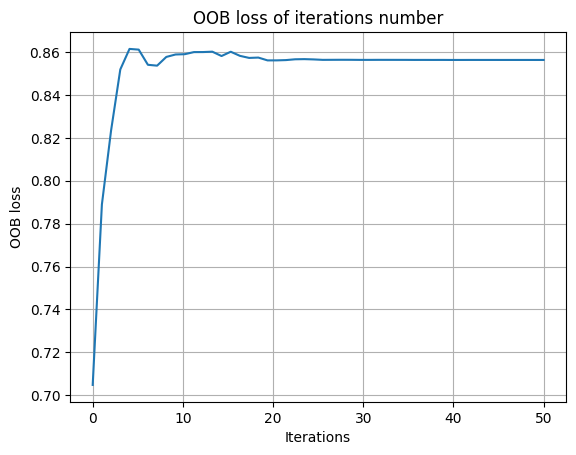

In [84]:
clf.fit(data.data, data.target)
cumsum = np.cumsum(clf.oob_improvement_)
x = np.linspace(0, len(cumsum), 50)
plt.plot(x, cumsum)
plt.xlabel("Iterations")
plt.ylabel("OOB loss")
plt.title("OOB loss of iterations number")
plt.grid()
#print(len(cumsum))